#### 목표
- 유방암 데이터셋 활용 유방암 예측 모델링(이진 분류)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer # 학습용 자료

In [3]:
breast_data = load_breast_cancer()
breast_data

# sklearn 제공 데이터셋
# 번치객체(딕셔너리처럼 활용)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
# 유방암 데이터에서 키값 확인
breast_data.keys()
# data : X (입력특성)
# target : y (정답데이터)
# target_names : 정답 클래스명
# feature_name : 특성명(컬럼명)
# DESCR : 데이터 설명

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
breast_data.target # 번치데이터는 []없이 .으로 실행 가능

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
breast_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
# X, y 데이터 분리
X = breast_data.data
y = breast_data.target
X.shape, y.shape

((569, 30), (569,))

In [11]:
pd.Series(y).value_counts()
# 1 : 양성
# 0 : 음성

,count
1,357
0,212


In [ ]:
# 비율
pd.Series(y).value_counts(normalize=True)

In [12]:
# train, test 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify = y,
                                                    random_state=1)
# stratify = y : train과 test데이터 클래스 비율을 동일하게 유지하여 분할

1. 문제정의
2. 데이터 수집
3. 데이터 전처리
4. 탐색적 데이터 분석
5. 모델선택, 하이퍼파라미터 분석
6. 학습
7. 평가

머신러닝은 3~4단게에 시간을 집중적으로 사용함
  - 특성 공학은 머신러닝 학습과정 자체에서는 불가능
- 딥러닝의 경우 딥러닝 자체에서 특성공학이 가능
  - 3,4단계 이상치, 결측치 제거 등의 과정이 짦다

In [13]:
# 도구 불러오기
from tensorflow.keras.models import Sequential # 러닝 모델 뼈대
from tensorflow.keras.layers import InputLayer, Dense # 딥러닝 모데 세부서계 (층)

In [15]:
import tensorflow as tf
print(tf.__version__)

2.18.0


- 각 층에서 뉴런의 개수를 정하는데, 몇가지 일반적인 가인드라인 존재
- 하지만 최적의 뉴런 개수는 문제의 특성, 데이터의 특성, 모델의 목적에 따라 달라 질 수 있음

- 뉴런의 개수의 참고용 기준
  - 입력특성의 개수가 많은 경우, 첫번째 은닉층의 뉴선 수를 더 크게 설정
  - 고차원 데이터의 경우, 더 많은 뉴런이 필요할 수 있다.
  - 은닉층의 개수를 늘리면, 복잡한 패턴을 학습하는데 도움이 될 수 있지만, 과대적합이 발생할 수 있음.

### 일반적인 경험적 규칙
- 첫번째 은닉층 : 입력 특성과 유사한 개수의 뉴런으로 시작
- 은닉층의 뉴런 수 줄이기 : 보통 첫번째 / 은닉충 이후의 층에서 뉴런 수를 점진적으로 줄이는 방법을 사용
- 과대적합방지 : 뉴런의 수가 너무 많으면, 과대적합의 위험성이 있으므로, 적절한 정규화기법(L1, L2 정규화) 사용 가능

- 교차 검증
- 그리드 서치
- 조기 종료

In [20]:
model = Sequential()

# 입력층 : Sequntial에 쌓은 첫번째 층, 뉴런수는 특성의 개수
model.add(InputLayer(shape=(30,)))

# 다층퍼셉트론 구현
# 은닉층(중간층) : 입력층과 출력층을 제외한 다른 모든 층
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=32, activation='sigmoid'))
# 뉴런 개수를 정하는 특별한 기준은 없음
# 층을 구성하는데에는 상당한 경험이 필요함

# 일반적인 경험에 의하면, 효율적인 방법이 있음
# 항아리 모양 : 입력층 32 > 2층 64 > 3층 32 > 4층 16 > 출력층 1

# 출력층 : 가장 마지막에 있는 층, 결과를 종합하는 층 / unit 수 = 예측하고 싶은 수(각각의 확률값)
# 출력층에서 사용하는 활성화 함수
# 이진분류 = sigmoid
# 다중분류 = softmax(각각의 확률)
# 회귀 = linear
model.add(Dense(units=1, activation='sigmoid'))

In [23]:
# 학습 방법 및 평가 방법 설정
model.compile(loss='binary_crossentropy',
              optimizer = 'SGD', # 최적화 방법 : 확률적 경사하강법
              metrics=['accuracy'])

In [24]:
# 모델 학습
h = model.fit(X_train, y_train,
              validation_split = 0.3,
              epochs = 100) # 반복 학습 횟수

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.6231 - loss: 0.6788 - val_accuracy: 0.6500 - val_loss: 0.6516
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6079 - loss: 0.6849 - val_accuracy: 0.6500 - val_loss: 0.6493
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6586 - loss: 0.6427 - val_accuracy: 0.6500 - val_loss: 0.6481
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6322 - loss: 0.6601 - val_accuracy: 0.6500 - val_loss: 0.6476
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6033 - loss: 0.6778 - val_accuracy: 0.6500 - val_loss: 0.6475
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6603 - loss: 0.6412 - val_accuracy: 0.6500 - val_loss: 0.6477
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6292 - loss: 0.6599 - val_accuracy: 0.6500 - val_loss: 0.6479
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5706 - loss: 0.6922 - val_accuracy: 0.6500 - val_loss:

In [26]:
# 모델 평가
model.evaluate(X_test, y_test)

# 손실값, 정확도

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6193 - loss: 0.6644 


[0.6612991690635681, 0.6257309913635254]

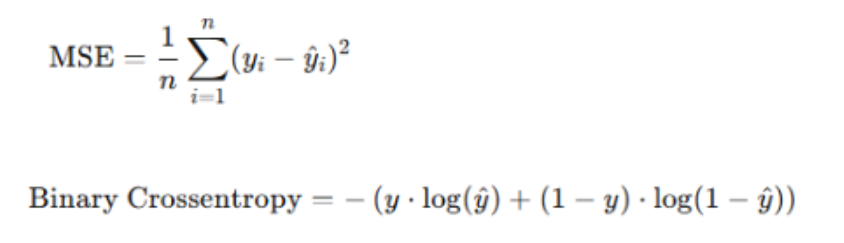

#### 손실함수(Loss Function) 설정
1. binary_crossentropy(이항 교차 엔트로피)
- y값이 이진분류인 경우 사용되는 손실함수
- 활성화함수로는 sigmoid 활용

2. categorical_crossentropy (범주형 교차 엔트로피)
- y값이 다중분류인 경우 사용되는 손실함수
- 활성화함수로는 softmax 활용
- 라벨이 (0,1,0,0), (0,0,1,0)과 같이 원핫 인코딩된 형태로 제공된 경우 활용.

3. sparse_categorical_crossentropy
- y값이 다중분류인 경우 사용되는 손실함수
- 활성화함수로는 softmax 활용
- 라벨이 (1,2,3,4)인 경우 사용

4. mean_squared_error(평균 제곱 오차)
- y값이 연속형인 경우 사용되는 손실함수
- 가장 흔하게 쓰임
- 대채로는 MAE(평균 절대 오차),RMSE

In [28]:
h.history

{'accuracy': [0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814,
  0.6187050342559814

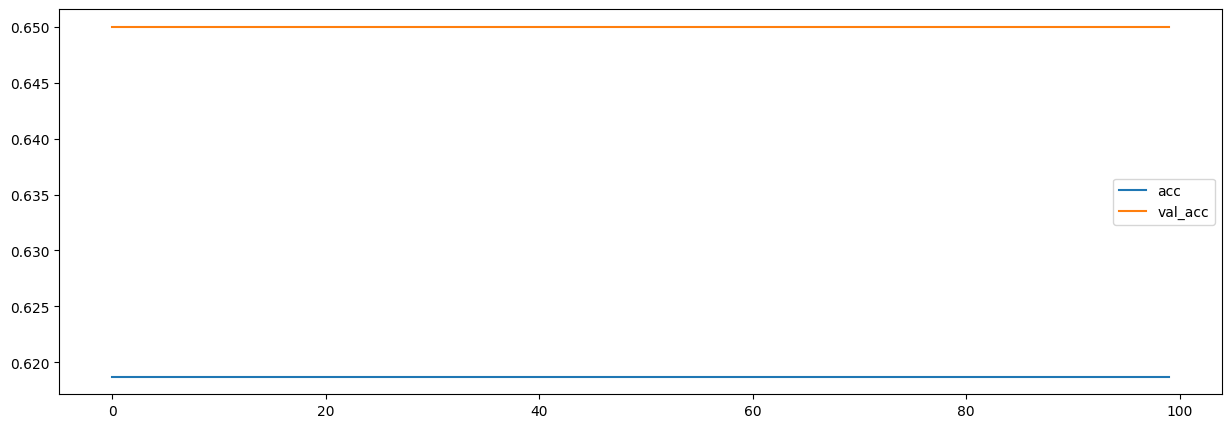

In [29]:
# 시각화
plt.figure(figsize=(15,5))
plt.plot(h.history['accuracy'], label='acc') # 훈련 데이터의 정확도
plt.plot(h.history['val_accuracy'], label='val_acc') #
plt.legend()
plt.show()

# 시각화 해석
# 학습정확도(acc), 검증 정확도(val_acc) 모두 거의 일정한 값을 유지하고 있으며, 이 값들은 낮은 수준에 머무르고 있다.
# 이러한 패턴은 모델이 학습되지 않고 있는 상황을 나타냄

# 활성화 함수를 다시 선택, 옵티마이저 선택, 모델 구조 변경, 학습률 조정

#### 모델의 정확도를 높여보자

In [34]:
model2 = Sequential()

# 입력층 : Sequntial에 쌓은 첫번째 층, 뉴런수는 특성의 개수
model2.add(InputLayer(shape=(30,)))

# 다층퍼셉트론 구현
# 은닉층(중간층) : 입력층과 출력층을 제외한 다른 모든 층
model2.add(Dense(units=64, activation='relu'))
model2.add(Dense(units=32, activation='relu'))
model2.add(Dense(units=16, activation='relu'))


# 출력층
model2.add(Dense(units=1, activation='sigmoid'))

In [35]:
# 학습 방법 및 평가 방법 설정
model2.compile(loss='binary_crossentropy',
              optimizer = 'adam', # adam : SGD 업그레이드 버전, 각 파라미터에 맞는 적응형 학습률을 적용
              metrics=['accuracy']) # 평가지표 : 분류 (정확도/accuracy)

In [36]:
# 모델 학습
h = model2.fit(X_train, y_train,
              validation_split = 0.3,
              epochs = 100) # 반복 학습 횟수

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.3868 - loss: 38.7974 - val_accuracy: 0.6500 - val_loss: 11.0182
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6074 - loss: 9.9829 - val_accuracy: 0.3500 - val_loss: 6.0446
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4053 - loss: 6.0942 - val_accuracy: 0.7000 - val_loss: 1.3721
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7007 - loss: 1.7288 - val_accuracy: 0.5417 - val_loss: 1.2818
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7046 - loss: 0.8808 - val_accuracy: 0.9250 - val_loss: 0.2592
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8699 - loss: 0.3958 - val_accuracy: 0.9167 - val_loss: 0.3329
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8836 - loss: 0.4785 - val_accuracy: 0.8833 - val_loss: 0.3926
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8611 - loss: 0.3494 - val_accuracy: 0.9167 - val_los

In [38]:
# 모델 평가
model2.evaluate(X_test, y_test)

# 손실값, 정확도

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9477 - loss: 0.1499 


[0.18951115012168884, 0.9298245906829834]

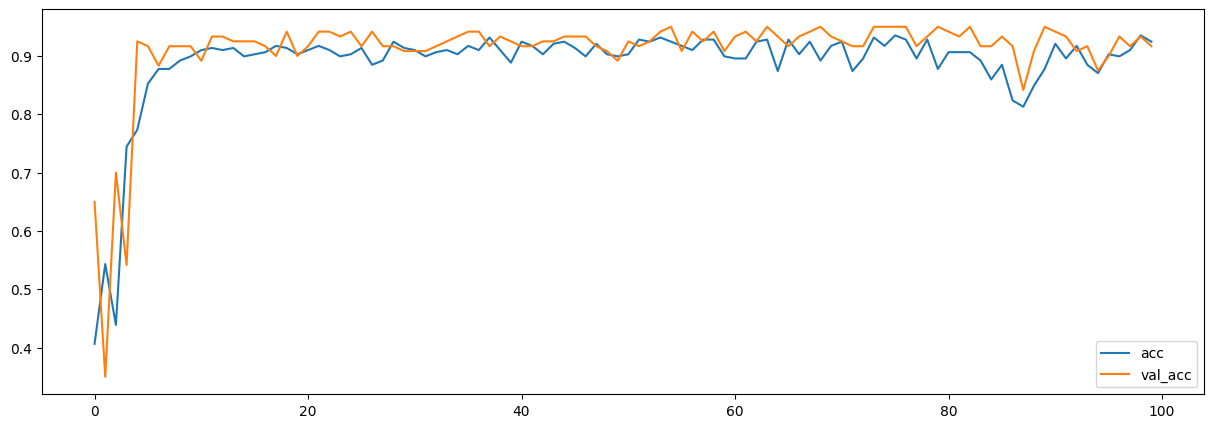

In [39]:
# 시각화
plt.figure(figsize=(15,5))
plt.plot(h.history['accuracy'], label='acc') # 훈련 데이터의 정확도
plt.plot(h.history['val_accuracy'], label='val_acc') #
plt.legend()
plt.show()


In [ ]:
# 초기 몇 에포크 동안 정확도가 급격하게 변화
# 에포크가 진행될수록 불안정한 구간도 있지만, 점차 안정화가 되어진다.